In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
%matplotlib inline

In [40]:
data = open("diamonds_data.txt") # Read the data in

data = data.read().split('\n') # Splits the data by newline into rows

cleaned_data = [row.split(' ')[1:] for row in data] # This splits our data into columns
cleaned_data = [[float(row[0]), float(row[1])] for row in cleaned_data[:-1]]

In [41]:
headers = ["Carot Weight", "Price in Singapore"]
data_di = pd.DataFrame(cleaned_data, columns=headers)
data_di = data_di.dropna()

In [71]:
df_train, df_test = train_test_split(data_di, test_size=0.33)
print(df_train.shape)
df_test.shape

(206, 2)


(102, 2)

In [84]:
score = 0
for item in range(10000):    
    df_train, df_test = train_test_split(data_di, test_size=0.33)
    cweight = np.array(df_train['Carot Weight']).reshape(206,1)
    cprice = np.array(df_train['Price in Singapore'].tolist()).reshape(206,1)
    cweight_test = np.array(df_test['Carot Weight']).reshape(102,1)
    cprice_test = np.array(df_test['Price in Singapore'].tolist()).reshape(102,1)
    regr1 = linear_model.LinearRegression()
    regr1.fit(cweight,cprice)
    score += regr1.score(cweight_test, cprice_test)
print(score/10000)
# R^2 =

0.890945043241


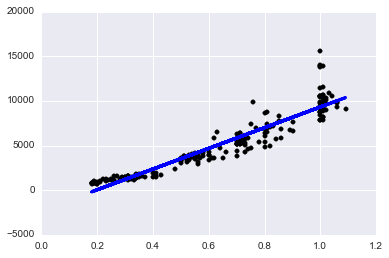

In [96]:
plt.scatter(cweight, cprice,  color='black')
plt.plot(cweight, regr1.predict(cweight), color='blue', linewidth=3)

In [93]:
print(regr1.coef_)
print(regr1.intercept_)

[[ 11593.56805099]]
[-2270.28404955]


In [120]:
predicted = regr1.predict(.84)[0][0]
observed = [row[1] for row in cleaned_data if row[0]==.84][0]
print(predicted,observed)
print("The Residual is", observed - predicted)

7468.31311328 5705.0
The Residual is -1763.31311328
